<a href="https://colab.research.google.com/github/undral0124/social-network-analysis/blob/main/lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторийн ажил 11**

B241910036 П.Ундрал

In [ ]:
pip install linkpred  # Python-д зориулсан `linkpred` нэртэй санг суулгаж байна

In [ ]:
import linkpred  # linkpred санг ашиглахын тулд импортолж байна

**Холбоос таамаглах үйл явцын үе шат**

linkpred сан нь холбоос таамаглах үйл явцыг дараах гурван үндсэн алхамаар гүйцэтгэдэг:

Сүлжээний мэдээллийг ачаалах – Network Loading


Таамаглагч алгоритмыг сонгож хэрэглэх – Predictor Selection and Application
Үр дүнг шинжлэн үнэлэх – Results Evaluation

Файлаас граф унших: сүлжээ байгуулах эхний алхам

Эхний алхам нь сүлжээг файлын мэдээллээс уншиж байгуулах юм. Энэ жишээнд бид Game of Thrones цувралын 6-р улирлын дүрүүдийн хоорондын харилцааг илэрхийлсэн ирмэгийн өгөгдлийг ашиглах болно.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt  # matplotlib-ийн график зурах pyplot модулийг plt нэрээр импортолж байна
import networkx as nx  # сүлжээний граф ажиллуулах networkx номын санг nx нэрээр импортолж байна

In [ ]:
def read_net_w(filename):  # жингтэй (weight) сүлжээний граф унших функц тодорхойлж байна
    g = nx.Graph()  # хоосон граф үүсгэж байна
    with open(filename) as f:  # өгөгдсөн файлыг нээж байна
        f.readline()  # эхний мөрийг (гарчиг) алгасаж уншиж байна
        for l in f:  # үлдсэн мөр бүрээр давталт хийж байна
            l = l.split(",")  # мөрийг таслалаар хувааж байна
            g.add_edge(l[0], l[1], weight=int(l[2]))  # хоёр оролцогч хооронд ирмэг нэмэх ба жинг нь 3-р баганаас авч байна
    return g  # бүтээсэн графыг буцааж байна

# Game of Thrones цувралын өгөгдөл
g = read_net_w(f'/content/sample_data/got-s6-edges.csv')  # өгөгдлийг уншиж графт хувиргаж байна

**Удирдлагагүй сургалтын таамаглагчийг ашиглах**

linkpred сан нь удирдлагагүй сургалтын олон төрлийн таамаглагчийг дэмждэг бөгөөд эдгээр нь дараах дөрвөн ангилалд хуваагддаг:

1. Хөршийн харьцуулалт (Neighborhood)

Энэ бүлэг нь орчны мэдээлэлд тулгуурласан таамаглагчдыг агуулдаг. Үүнд:

AdamicAdar, CommonNeighbours, Jaccard, Cosine, DegreeProduct
AssociationStrength, MaxOverlap, MinOverlap, NMeasure, Pearson
ResourceAllocation

2. Замд суурилсан аргачлал (Paths)

Сүлжээнд орших замуудын урт, тоо хэмжээг харгалзан үздэг аргууд. Үүнд:

Katz, GraphDistance

3. Эрэмбэлэх хандлага (Ranking)

Ул мөрийг нь даган үнэлэх болон төвшин тогтоох аргууд. Үүнд:

SimRank, RootedPageRank

4. Бусад төрөл (Miscellanea)

Үлдсэн төрөл бүрийн таамаглагчид багтана. Үүнд:

Community, Copy, Random

**Neighborhood ангиллын таамаглагчид**

Энэ бүлгийн таамаглагчид нь сүлжээ дэх зангилаануудын хөрш оройн бүтэц дээр үндэслэн холбоос үүсэх боломжийг тооцоолдог. Өөрөөр хэлбэл, хоёр оройн хооронд холбоос үүсэх эсэхийг тухайн оройн хамгийн ойрын хөршүүдийн харилцан хамаарал, тэдгээрийн хоорондын хүчтэй эсвэл сул холбоо зэргээс хамааран таамагладаг.

Энэ төрлийн аргууд дараах асуултад хариу эрэлхийлдэг:

"Хоёр хүн найз болохын тулд тэд хэдий хэмжээний нийтлэг найзуудтай байх хэрэгтэй вэ?"

Common Neighbors (Дундын хөршүүд)

Хамгийн энгийн бөгөөд түгээмэл хэрэглэгддэг нэгэн арга бол Common Neighbors арга юм. Энэ нь хоёр зангилаа (ороцогч) дунд хэдэн нийтлэг хөрш орой (найз нөхөд, хамтрагч гэх мэт) байгааг тооцоолох замаар холбоосын магадлалыг тодорхойлдог.

Утга нь: Хэрвээ хоёр хүн илүү олон нийтлэг найзтай бол, тэдний хооронд шинэ холбоо үүсэх магадлал төдийчинээ өндөр байна.

In [ ]:
cn = linkpred.predictors.CommonNeighbours(g, excluded=g.edges())
# Common Neighbours (Нийтлэг хөршүүд) таамаглагчийг үүсгэж байна.
# Бид зөвхөн шинэ холбоосуудыг таамаглахыг зорьж байгаа тул, одоо байгаа холбоосуудыг (g.edges()) хасаж байгаа.

cn_results = cn.predict()
# Таамагласан холбоосуудын үр дүнг гаргаж авч байна

top = cn_results.top(5)
# Дээд 5 холбоосыг оноогоор нь авч байна

for edge, score in top.items():
    print(edge, score)
    # Топ 5 холбоос болон тэдгээрийн оноог хэвлэж байна

TOMMEN - MACE 8.0
NED - LADY_CRANE 8.0
NED - CLARENZO 8.0
MARGAERY - IZEMBARO 8.0
MARGAERY - ARYA 8.0


**Jaccard (Жаккардын индекс)**

Jaccard арга нь топологи бүтэц болон оройн аттрибутуудын ижил төсөөтэй байдал дээр суурилдаг. Энэ арга нь хоёр зангилааны хооронд шинэ холбоо үүсэх магадлалыг тодорхойлохдоо тухайн оройнуудын хоорондох нийтлэг шинж чанарууд (найзууд, аттрибутууд) хэр их байгааг харгалзан үздэг.


Утга нь: Хэрвээ хоёр орой ижил төстэй аттрибутууд эсвэл хөрш оройнуудтай (найз нөхөдтэй) байх нь өндөр байвал, тэдний хооронд холбоо үүсэх магадлал ч өндөр байна.

In [ ]:
jc = linkpred.predictors.Jaccard(g, excluded=g.edges())
# Jaccard аргачлалаар таамаглагч үүсгэж байна.
# Бид зөвхөн шинэ холбоосуудыг таамаглахыг зорьж байгаа тул, одоо байгаа холбоосуудыг (g.edges()) хасаж байгаа.

jc_results = jc.predict()
# Таамагласан холбоосуудын үр дүнг гаргаж авч байна

top = jc_results.top(5)
# Дээд 5 холбоосыг оноогоор нь авч байна

for edge, score in top.items():
    print(edge, score)
    # Топ 5 холбоос болон тэдгээрийн оноог хэвлэж байна

RED_PRIEST - KINVARA 1.0
LITTLE_SAM - DICKON 1.0
TOMMEN - MACE 0.7272727272727273
JOFFREY - CAMELLO 0.7272727272727273
OLD_NAN - BENJEN 0.7142857142857143


**Adamic/Adar (Адамик/Адар)**

Adamic/Adar арга нь дундын найзуудын тоо болон тэдгээрийн "чухал байдал" (бусад оройтой харьцах харилцааны хэмжээг харгалзан) дээр суурилдаг. Энэ арга нь хоёр оройнуудын дунд нийтлэг найзуудын тоог тооцоолохоос гадна, тэдгээр найзуудын тоо болон тухайн найзуудын сүлжээний байрлалын онцлогийг харгалзан үздэг.


Утга нь: Хэрвээ хоёр орой их хэмжээний дундын найзуудтай бөгөөд эдгээр найзууд нь сүлжээнд чухал байр суурь эзэлж байгаа бол, тэдний хооронд холбоо үүсэх магадлал өндөр байна.

In [ ]:
aa = linkpred.predictors.AdamicAdar(g, excluded=g.edges())
# Adamic-Adar аргачлалаар таамаглагч үүсгэж байна.
# Бид зөвхөн шинэ холбоосуудыг таамаглахыг зорьж байгаа тул, одоо байгаа холбоосуудыг (g.edges()) хасаж байгаа.

aa_results = aa.predict()
# Таамагласан холбоосуудын үр дүнг гаргаж авч байна

top = aa_results.top(5)
# Дээд 5 холбоосыг оноогоор нь авч байна

for edge, score in top.items():
    print(edge, score)
    # Топ 5 холбоос болон тэдгээрийн оноог хэвлэж байна

TOMMEN - MACE 3.1875572810307893
NED - LADY_CRANE 3.126371165725784
NED - CLARENZO 3.126371165725784
SANSA - ROBB 3.0966443151332466
JOFFREY - CAMELLO 2.894493711932914


**Paths ангиллын таамаглагчид**


Хоёрдогч төрлийн таамаглагчид нь хоёр оройн хоорондын зай буюу тэдний сүлжээнд байрлалын хол зай дээр тулгуурлан, ирээдүйд тэдний хооронд холбоо үүсэх магадлалыг тооцоолдог. Тэдгээр нь оройн хоорондын зайг тооцоолохын тулд сүлжээний замууд болон тэдгээрийн урт, тоо хэмжээг ашигладаг.

Энэхүү төрөл нь дараах асуултад хариу олохыг хичээдэг:

"Бид хэр хол зайтай байгаа вэ?"
Katz

Katz арга нь хоёр оройн хоорондох бүх боломжит замуудыг тооцоолж, эдгээр замуудын жингийн нийлбэрийг тодорхойлдог. Тодруулбал, энэ арга нь бүх замуудын урт болон тэдгээрийн "жингийг" харгалзан, хоёр орой хооронд шинэ холбоо үүсэх магадлалыг тодорхойлно.

Утга нь: Katz арга нь бүх боломжит замуудын жингийг тооцоолж, тухайн оройнуудын хооронд холбоо үүсэх боломжийг илүү нарийвчлан таамагладаг.

In [ ]:
kz = linkpred.predictors.Katz(g, excluded=g.edges())
# Katz аргачлалаар таамаглагч үүсгэж байна.
# Бид зөвхөн шинэ холбоосуудыг таамаглахыг зорьж байгаа тул, одоо байгаа холбоосуудыг (g.edges()) хасаж байгаа.

kz_results = kz.predict()
# Таамагласан холбоосуудын үр дүнг гаргаж авч байна

top = kz_results.top(5)
# Дээд 5 холбоосыг оноогоор нь авч байна

for edge, score in top.items():
    print(edge, score)
    # Топ 5 холбоос болон тэдгээрийн оноог хэвлэж байна


LADY_CRANE - JAQEN 0.005571576860773001
SANSA - ALLISER_THORNE 0.004234378077202
TYRION - DAARIO 0.004145905054793999
CERSEI - BRIENNE 0.0038862606857720003
MELISANDRE - LYANNA_MORMONT 0.0035937193855959996


**Graph Distance (Графын зай)**

Graph Distance буюу графын зай нь хоёр оройн хоорондох богино замын урт буюу тэдгээрийн хоорондох хамгийн ойрын холболтын хэмжээг илэрхийлнэ. Энэ арга нь тухайн оройнуудын хоорондох хамгийн бага алхамуудын тоог тодорхойлж, хоёр оройн хооронд холбоо үүсэх магадлал хэр өндөр байж болохыг тооцоолно.


Утга нь: Графын зай нь хамгийн ойрын зам-ыг тодорхойлж, хэрвээ хоёр орой нь ойрхон байрладаг бол холбоо үүсэх магадлал өндөр байдаг.

In [ ]:
gd = linkpred.predictors.GraphDistance(g, excluded=g.edges())
# GraphDistance (Графын зай) аргачлалаар таамаглагч үүсгэж байна.
# Бид зөвхөн шинэ холбоосуудыг таамаглахыг зорьж байгаа тул, одоо байгаа холбоосуудыг (g.edges()) хасаж байгаа.

gd_results = gd.predict()
# Таамагласан холбоосуудын үр дүнг гаргаж авч байна

top = gd_results.top(5)
# Дээд 5 холбоосыг оноогоор нь авч байна

for edge, score in top.items():
    print(edge, score)
    # Топ 5 холбоос болон тэдгээрийн оноог хэвлэж байна

LADY_CRANE - JAQEN 36.136054421768705
TYRION - DAARIO 30.29268292682927
CERSEI - BRIENNE 28.44827586206896
MELISANDRE - LITTLEFINGER 23.427491305005294
CERSEI - BRONN 23.294117647058822


**Ranking ангиллын таамаглагчид**

Гуравдагч бүлгийн таамаглагчид нь граф дахь оройн байрлалаас хамааран хоёр оройн хоорондын холбоос үүсэх магадлалыг тооцоолдог. Энэ төрлийн таамаглагчид оройн хоорондын төстэй байдал, эсвэл холбогдож буй оройнуудын байрлалын зөрүүг харгалзан үнэлдэг.

Энэ бүлэг нь дараах асуултад хариулж байж холбоо үүсэх магадлалын талаар дүгнэлт гаргадаг:

"Бид хэрхэн төстэй вэ?"


**SimRank**

SimRank арга нь хоёр зангилааны хооронд холбоос үүсэхийн тулд тэдгээрийн хөрш оройнууд ижил төстэй байх шаардлагатай гэж үздэг. Тодруулбал, энэ арга нь хоёр оройн хөршүүдийн төстэй байдлыг тооцоолж, хэрвээ тэдгээр оройнуудын хөршүүд нь ижил төстэй байвал, тухайн хоёр орой хооронд холбоо үүсэх магадлал өндөр гэж үздэг.

Утга нь: Хоёр оройны хооронд холбоо үүсэхийн тулд тэдний хөрш оройнууд төсөөтэй байх шаардлагатай, ингэснээр холбоо үүсэх магадлал илүү өндөр болно.
Энэхүү арга нь графын топологийн хөрш оройнуудын ижил төстэй байдлыг тодорхойлж, холбогдох оройнуудын хооронд илүү их магадлалтай холбоо үүсэхийг таамагладаг.

In [ ]:
simrank = linkpred.predictors.SimRank(g, excluded=g.edges())
# SimRank аргачлалаар таамаглагч үүсгэж байна.
# Бид зөвхөн шинэ холбоосуудыг таамаглахыг зорьж байгаа тул, одоо байгаа холбоосуудыг (g.edges()) хасаж байгаа.

simrank_results = simrank.predict(c=0.5)
# SimRank аргачлалыг ашиглан холбоосын таамаглал гүйцэтгэж, таамаглалын коэффициент (c=0.5) оруулж байна.
# `c` коэффициент нь нийтлэг хөршүүдийн тоо болон тэдгээрийн уялдаа холбоог хэрхэн онцолсон болохыг илтгэдэг.

top = simrank_results.top(5)
# Дээд 5 холбоосыг оноогоор нь авч байна

for edge, score in top.items():
    print(edge, score)
    # Топ 5 холбоос болон тэдгээрийн оноог хэвлэж байна

MAESTER_CITADEL - MAESTER_AEMON 0.3920701611834253
RAY - GATINS 0.3886464843365491
GATINS - BERIC 0.3675791855431439
THOROS - GATINS 0.3636591552182033
MAESTER_AEMON - GILLY 0.319889623157789


**Miscellanea ангилал**

Miscellanea бүлэг нь холбоос таамаглахад санамсаргүй байдлаар сонгосон аргуудыг агуулдаг. Энэ бүлэгт орох аргууд нь ихэвчлэн суурь ба тэгш байдлыг шалгах зорилгоор хэрэглэгддэг, гэхдээ энэ нь ч мөн таамаглахад хэрэглэгддэг нэг арга зам юм.

linkpred сан нь энд санамсаргүй аргуудыг оруулсан бөгөөд эдгээр нь холбогдох холбоосыг таамаглахад суурь түвшний шалгуур болгож ашиглагддаг.

**Random (Санамсаргүй)**

Random арга нь холбоосыг санамсаргүй байдлаар таах аргын жишээг харуулдаг. Энэ нь ямар нэгэн онцлог эсвэл хамааралгүйгээр, сүлжээнд байгаа оройнуудын хооронд санамсаргүйгээр холбоос үүсгэдэг.

Утга нь: Энэ арга нь суурь шалгуур болгож хэрэглэгддэг бөгөөд илүү нарийн аргачлалтай харьцуулахад ямар ч тодорхой хамааралгүйгээр холбоос үүсгэхийг зорьдог.

In [ ]:
rnd = linkpred.predictors.Random(g, excluded=g.edges())
# Random (Санамсаргүй) аргачлалаар таамаглагч үүсгэж байна.
# Бид зөвхөн шинэ холбоосуудыг таамаглахыг зорьж байгаа тул, одоо байгаа холбоосуудыг (g.edges()) хасаж байгаа.

rnd_results = rnd.predict()
# Санамсаргүй таамаглал гүйцэтгэж байна

top = simrank_results.top(5)
# Дээрх код нь `simrank_results`-ыг ашигласан байгаа, харин та `rnd_results` ашиглах ёстой.
# Тиймээс энд `simrank_results`-г орлуулж `rnd_results` байлгах хэрэгтэй.

for edge, score in top.items():
    print(edge, score)
    # Топ 5 холбоос болон тэдгээрийн оноог хэвлэж байна

MAESTER_CITADEL - MAESTER_AEMON 0.3920701611834253
RAY - GATINS 0.3886464843365491
GATINS - BERIC 0.3675791855431439
THOROS - GATINS 0.3636591552182033
MAESTER_AEMON - GILLY 0.319889623157789


**Таамаглагчидыг харьцуулах болон үнэлэх**

Холбоосуудыг үүсэх эсэхийг таамаглах үйл явцад бид сургалтын (training) болон тестийн (testing) өгөгдлүүдийг ашиглан үр дүнг үнэлнэ. Энэ нь таамаглагчийн өргөн цар хүрээтэй туршилт хийх, зорилтот өгөгдлөөс нь гажихгүй байх нөхцөлийг хангах зорилготой юм.

Өгөгдлийг сургалтын болон тестийн гэж хуваах

Таамаглагчийн үнэлгээ хийхийн тулд бид өгөгдлийг сургалтын болон тестийн гэж хоёр ангилдаг. Энэ хуваалтууд нь дараах зорилготой:

Сургалтын өгөгдөл (Training Data): Энэ өгөгдлөөр таамаглагчийг сургалтад оруулж, мэдлэг олж авдаг.

Тестийн өгөгдөл (Testing Data): Энэ өгөгдлийг сургалт дууссаны дараа таамаглагчийн зохистой байдал болон нөхцөлд нийцэх эсэхийг шалгах зорилгоор ашигладаг.

Өгөгдлийг зөв хувааж ашиглах нь таамаглагчийн чухал үнэлгээ болон гүний тест хийж, түүний бат бөх байдал болон тестийн орчинд гүйцэтгэлийг шалгах боломжийг олгодог.

In [ ]:
import random  # санамсаргүй тоонууд болон үйлдлүүдийг хийхийн тулд random номын санг оруулж байна
import itertools  # itertools номын санг оруулж байна (олон төрлийн комбинаториуд болон давталт хийхэд ашиглана)
from linkpred.evaluation import Pair  # linkpred номын сангийн evaluation хэсгээс Pair класс оруулж байна

# Туршилтын сүлжээг үүсгэж байна
test = read_net_w(f'/content/sample_data/got-s7-edges.csv')  # test сүлжээний өгөгдлийг уншиж байна

# Сургалтын үе шатнаас test сүлжээг хасаж байна
training = g.copy()  # сургалтын сүлжээг g графын хуулбараар үүсгэж байна

# Узелуудын жагсаалт
nodes = list(g.nodes())  # сургалтын сүлжээгээс бүх узелуудыг жагсааж байна
nodes.extend(list(test.nodes()))  # туршилтын сүлжээгээс мөн узелуудыг нэмж байна

# Туршилтын багц болон ертөнцийн багцыг тооцоолох
test = [Pair(i) for i in test.edges()]  # туршилтын сүлжээгээс бүх холбоосуудын хосыг Pair обьект болгон хувиргаж байна
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0]!=i[1]])
# Узелуудын бүх боломжит хослолуудыг үүсгэж байна, өөрөөр хэлбэл бүх боломжит холбоосуудыг, өөрийнтэйгөө холбоос үүсгэхгүй

Дараагаар нь бид сургалтын өгөгдөл дээрээ таамаглагчаа ажиллуулна.

In [ ]:
cn = linkpred.predictors.CommonNeighbours(training, excluded=training.edges())
# Common Neighbours (Нийтлэг хөршүүд) таамаглагчийг үүсгэж байна.
# Сургалтын сүлжээнээс аль хэдийн байгаа холбоосуудыг (training.edges()) хасаж, зөвхөн шинэ холбоосуудыг таамаглахыг зорьж байгаа.

cn_results = cn.predict()
# Common Neighbours аргачлалаар холбоосуудыг таамаглаж байна

aa = linkpred.predictors.AdamicAdar(training, excluded=training.edges())
# Adamic-Adar таамаглагчийг сургалтын сүлжээнд үүсгэж байна.
# Энэ арга нь нийтлэг хөршүүдийн тоог болон тэдгээрийн зартай байдлыг харгалзан холбоосуудыг таамаглана.

aa_results = aa.predict()
# Adamic-Adar аргачлалаар холбоосуудыг таамаглаж байна

jc = linkpred.predictors.Jaccard(training, excluded=training.edges())
# Jaccard таамаглагчийг сургалтын сүлжээнд үүсгэж байна.
# Jaccard арга нь хоёр узелийн нийтлэг хөршүүдийн харьцааг ашиглан холбоос үүсэх магадлалыг тооцоолно.

jc_results = jc.predict()
# Jaccard аргачлалаар холбоосуудыг таамаглаж байна

Тестийн өгөгдлөө ашиглан таамаглагч хэр үнэн таамаглаж буй үнэлнэ.


In [ ]:
cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)
# Common Neighbours (Нийтлэг хөршүүд) аргачлалаар гаргасан таамаглалын үр дүнг (cn_results)
# болон тест сүлжээ (test) болон бүх боломжит холбоосуудын багц (universe)-тай хамт хэрэглэж,
# холбоосын таамаглалыг үнэлж байна.

aa_evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test, universe)
# Adamic-Adar аргачлалаар гаргасан таамаглалын үр дүнг (aa_results),
# тест сүлжээ (test) болон бүх боломжит холбоосууд (universe)-тай хамт хэрэглэж,
# холбоосын таамаглалыг үнэлж байна.

jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)
# Jaccard аргачлалаар гаргасан таамаглалын үр дүнг (jc_results),
# тест сүлжээ (test) болон бүх боломжит холбоосууд (universe)-тай хамт хэрэглэж,
# холбоосын таамаглалыг үнэлж байна.

Үр дүнгүүдээ тайлбарлахдаа ROC -ийн муруй ашиглан дүрслэнэ.


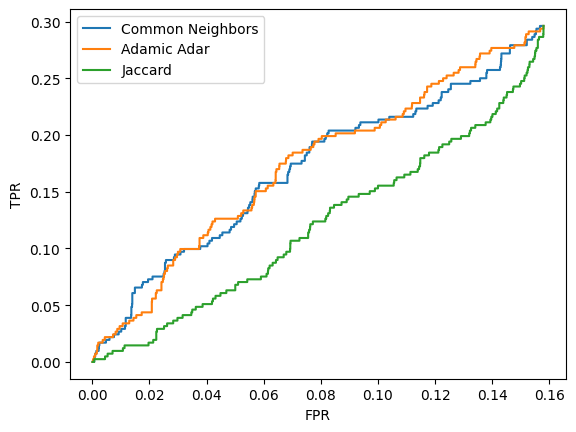

In [ ]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
# Common Neighbours аргачлалын Fallout (Хуурамч эерэг) болон Recall (Тууштай байдал) утгуудыг графикаар зурах.
# TPR (True Positive Rate) ба FPR (False Positive Rate)-ийг дүрслэх болно.

plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
# Adamic-Adar аргачлалын Fallout болон Recall утгуудыг графикаар зурах.

plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
# Jaccard аргачлалын Fallout болон Recall утгуудыг графикаар зурах.

plt.ylabel("TPR")
# Y тагийг "True Positive Rate" буюу TPR гэж тэмдэглэж байна.

plt.xlabel("FPR")
# X тагийг "False Positive Rate" буюу FPR гэж тэмдэглэж байна.

plt.legend()
# Графикийн тулд тайлбар нэмэх буюу легенд үүсгэж байна (аргачлал бүрийн нэрийг).

plt.show()
# Бүх графикуудыг харуулах.

**ROC муруй болон AUC**

ROC муруй нь таамаглагчийн гүйцэтгэлийг True Positive Rate (TPR) ба False Positive Rate (FPR)-ийн харьцаагаар илэрхийлдэг график юм.
AUC (Area Under the Curve) нь ROC муруй доорх талбайг хэмжиж, таамаглагчийн гүйцэтгэлийг 0-1 хооронд үнэлнэ. AUC = 1 бол маш сайн, AUC = 0.5 бол санамсаргүй таамаглал, AUC < 0.5 бол муу гүйцэтгэл.

Товч дүгнэлт:

ROC муруй нь гүйцэтгэлийг график хэлбэрээр харуулдаг.
AUC нь таамаглагчийн гүйцэтгэлийн тоон үнэлгээ болж, 1-ийн дээд тал нь хамгийн сайн гүйцэтгэлтэй гэж тооцогддог.

In [ ]:
from sklearn.metrics import auc  # sklearn номын сангаас auc (Area Under the Curve) хэрэгслийг оруулж байна

print("Area Under Roc Curve (AUROC)")
# AUROC буюу ROC бөгжийн доод талын талбайг хэвлэж байна

print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")
# Common Neighbors аргачлалын ROC бөгжийн доорхи талбайг (AUROC) тооцоолж хэвлэж байна

print(f"Adamic Adar: \t {auc(aa_evaluation.fallout(), aa_evaluation.recall())}")
# Adamic-Adar аргачлалын ROC бөгжийн AUROC-ийг тооцоолж хэвлэж байна

print(f"Jaccard: \t {auc(jc_evaluation.fallout(), jc_evaluation.recall())}")
# Jaccard аргачлалын ROC бөгжийн AUROC-ийг тооцоолж хэвлэж байна

Area Under Roc Curve (AUROC)
Common Neigh.: 	 0.026832485313825823
Adamic Adar: 	 0.027259625028069757
Jaccard: 	 0.018894838921578106


**Дүгнэлт:**

Jaccard ба Adamic-Adar ялгаа:

Jaccard нь хоёр узелийн хамтрагчийн тоог харьцуулж, холбоос үүсэх магадлалыг тооцоолдог. Энэ нь энгийн бөгөөд тус бүрийн хамтрагчийн тоог харьцуулдаг.
Adamic-Adar нь хоёр узелийн хамтрагчид дээр логарифм ашиглан илүү нарийвчилсан үнэлгээ гаргадаг. Энэ нь хамтрагчийн тоо ихтэй узелүүдийг илүү их жинтэй үнэлдэг.

Link Prediction with Decision Tree using Linkpred:

Linkpred сан нь холбоос илрүүлэх олон алгоритм дэмждэг бөгөөд Decision Tree алгоритм нь сүлжээний шинж чанар (узелийн хамтрагчийн тоо, холболтын төрөл гэх мэт)-г ашиглан холбоос үүсэх магадлалыг тооцоолдог. Decision Tree нь өгөгдөлд тулгуурлан шийдвэр гаргаж, холбоос үүсэх эсэхийг тодорхойлно.